In [1]:
# 导入必要的包
import tensorflow.examples.tutorials.mnist.input_data as input_data
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=False)
print('训练集train数量：',mnist.train.num_examples,
     ',验证集 validation 数量：',mnist.validation.num_examples,
     ',测试集 test 数量：',mnist.test.num_examples)
warnings.filterwarnings('ignore')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
训练集train数量： 55000 ,验证集 validation 数量： 5000 ,测试集 test 数量： 10000


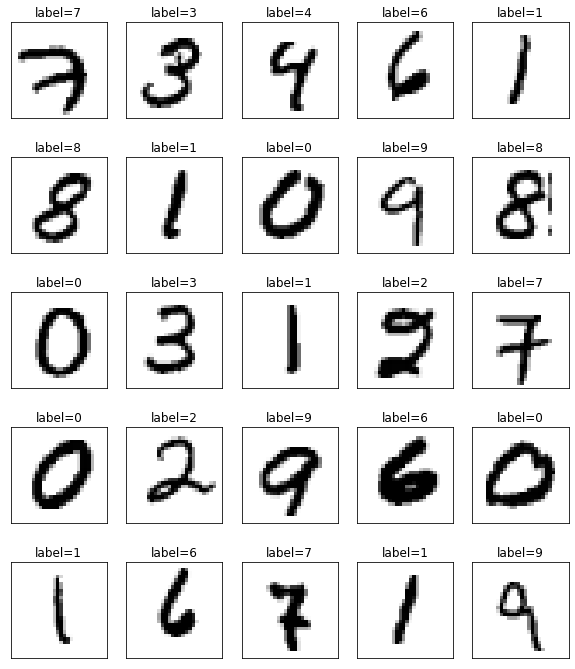

In [3]:
# 可视化数据
fig = plt.gcf() #获取当前图表
fig.set_size_inches(10,12) #1英寸等于 2.54cm

for i in range(0,25):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(mnist.train.images[i].reshape(28,28),cmap="binary")
    ax.set_title("label="+str(mnist.train.labels[i]))
    ax.set_xticks([]) #不显示x轴
    ax.set_yticks([]) #不显示y轴

In [4]:
# KNN训练模型
def mySelf(dist):
    return np.exp(-dist**2/2*0.3**2)

neigh = KNeighborsClassifier(n_neighbors=3,weights =mySelf,n_jobs=-1)
neigh.fit(mnist.train.images,mnist.train.labels)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3,
                     weights=<function mySelf at 0x0000014AE06FCAE8>)

In [5]:
predict = np.array(neigh.predict(mnist.validation.images[0:]))
real = np.array(mnist.validation.labels)

In [6]:
index = np.arange(0, predict.size)
result = index[predict != real]

# 查看KNN在验证集上的正确率
accuracy = 1-(result.size/predict.size)
print("KNN在验证集上的正确率为：%.2f" % accuracy)

KNN在验证集上的正确率为：0.98


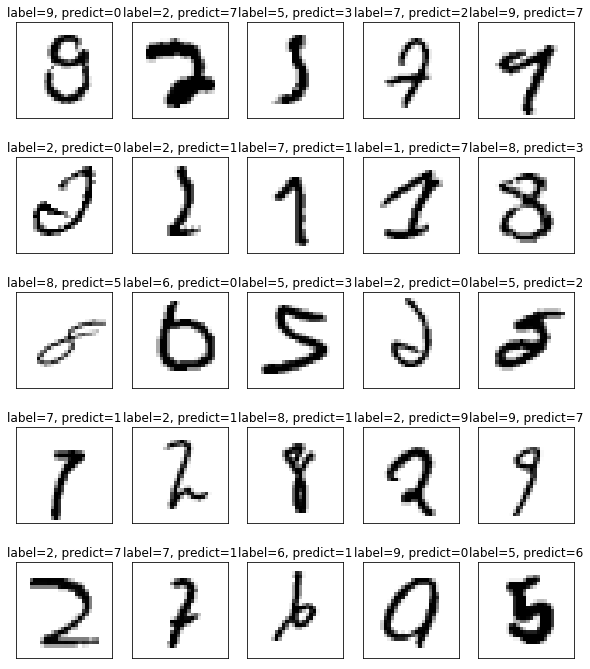

In [7]:
# 可视化数据
fig = plt.gcf() #获取当前图表
fig.set_size_inches(10,12) #1英寸等于 2.54cm

for i in range(0,25):
    ax = plt.subplot(5,5,i+1)
    title = "label="+str(mnist.validation.labels[result[i]]) + ", predict="+str(predict[result[i]])
    ax.imshow(mnist.validation.images[result[i]].reshape(28,28),cmap="binary")
    ax.set_title(title)
    ax.set_xticks([]) #不显示x轴
    ax.set_yticks([]) #不显示y轴

In [8]:
result.size

114